In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data
import datetime as dt

In [4]:
# if dont have data reader do this
#!pip install pandas_datareader

In [6]:
# want to get data from FRED

In [7]:
start_date = dt.datetime(2000,1,1)

In [8]:
start_date

datetime.datetime(2000, 1, 1, 0, 0)

In [9]:
data_codes = ["GDPC1", "PCECC96", "GPDIC1", "GCEC1", "EXPGSC1", "IMPGSC1"]

In [10]:
usdata = data.DataReader(data_codes, "fred", start_date)

In [11]:
usdata.head()

,GDPC1,PCECC96,GPDIC1,GCEC1,EXPGSC1,IMPGSC1
DATE,,,,,,
2000-01-01,12924.179,8520.710,2257.109,2645.393,1337.203,1853.884
2000-04-01,13160.842,8603.007,2390.733,2671.254,1375.203,1911.437
2000-07-01,13178.419,8687.485,2367.274,2659.687,1408.783,1978.137
2000-10-01,13260.506,8762.205,2371.809,2675.695,1396.844,1977.750
2001-01-01,13222.690,8797.280,2264.202,2716.773,1376.171,1946.136


In [12]:
usdata.columns = ['gdp', 'cons', 'invs', 'gov', 'exp', 'imp'] 

In [13]:
usdata['nx'] = usdata.exp - usdata.imp

In [14]:
usdata.head()

,gdp,cons,invs,gov,exp,imp,nx
DATE,,,,,,,
2000-01-01,12924.179,8520.710,2257.109,2645.393,1337.203,1853.884,-516.681
2000-04-01,13160.842,8603.007,2390.733,2671.254,1375.203,1911.437,-536.234
2000-07-01,13178.419,8687.485,2367.274,2659.687,1408.783,1978.137,-569.354
2000-10-01,13260.506,8762.205,2371.809,2675.695,1396.844,1977.750,-580.906
2001-01-01,13222.690,8797.280,2264.202,2716.773,1376.171,1946.136,-569.965


In [15]:
var_list = ['gdp', 'cons', 'invs', 'gov', 'nx'] 

In [17]:
for iVar in var_list:
    new_name = iVar + '_growth'
    usdata[new_name] = 100*4*usdata[iVar].pct_change()

In [18]:
usdata.head()

,gdp,cons,invs,gov,exp,imp,nx,gdp_growth,cons_growth,invs_growth,gov_growth,nx_growth
DATE,,,,,,,,,,,,
2000-01-01,12924.179,8520.710,2257.109,2645.393,1337.203,1853.884,-516.681,NaN,NaN,NaN,NaN,NaN
2000-04-01,13160.842,8603.007,2390.733,2671.254,1375.203,1911.437,-536.234,7.324659,3.863387,23.680558,3.910345,15.137387
2000-07-01,13178.419,8687.485,2367.274,2659.687,1408.783,1978.137,-569.354,0.534221,3.927836,-3.924989,-1.732070,24.705632
2000-10-01,13260.506,8762.205,2371.809,2675.695,1396.844,1977.750,-580.906,2.491558,3.440351,0.766282,2.407501,8.115865
2001-01-01,13222.690,8797.280,2264.202,2716.773,1376.171,1946.136,-569.965,-1.140711,1.601195,-18.147667,6.140909,-7.533749


## Plotting!

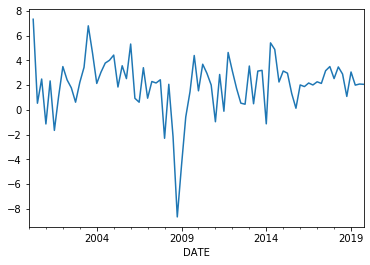

In [19]:
fig, ax = plt.subplots()

usdata.gdp_growth.plot(ax = ax)

plt.show()

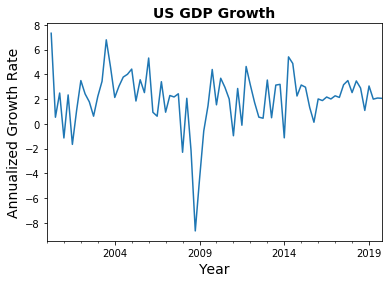

In [26]:
fig, ax = plt.subplots()

usdata.gdp_growth.plot(ax = ax)

ax.set_title('US GDP Growth', fontsize= 14, fontweight = 'bold')
ax.set_ylabel('Annualized Growth Rate', fontsize = 14)
ax.set_xlabel('Year', fontsize = 14)

plt.show()


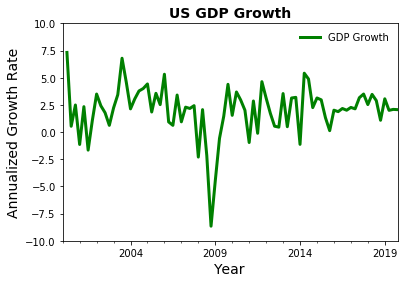

In [37]:
fig, ax = plt.subplots()

usdata.gdp_growth.plot(ax = ax, linewidth = 3.0, color = 'g')

ax.set_title('US GDP Growth', fontsize= 14, fontweight = 'bold')
ax.set_ylabel('Annualized Growth Rate', fontsize = 14)
ax.set_xlabel('Year', fontsize = 14)

ax.set_ylim(-10, 10)

ax.legend(["GDP Growth"], frameon = False)

plt.show()

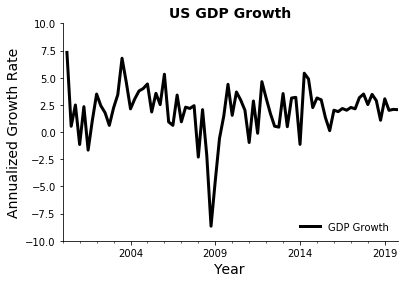

In [53]:
fig, ax = plt.subplots()

usdata.gdp_growth.plot(ax = ax, linewidth = 3.0, color = 'black')

ax.set_title('US GDP Growth', fontsize= 14, fontweight = 'bold')
ax.set_ylabel('Annualized Growth Rate', fontsize = 14)
ax.set_xlabel('Year', fontsize = 14)

ax.set_ylim(-10, 10)
ax.set_xlim(dt.datetime(2000,1,1))

ax.legend(["GDP Growth"], frameon = False, loc = "lower right")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig("us_gdp_growth_bw.pdf", bb_inches = "tight", dip = 1200)

plt.show()

In [54]:
!ls .

intro-plotting.ipynb  us_gdp_growth_bw.pdf


# Challenge

Make and save a plot of net export growth. Can you figure how to add a horizontal line with the avg growth rate of net exports?



In [56]:
import numpy as np

In [71]:
import matplotlib.dates as mdates

In [57]:
usdata['avg_nx_growth'] = np.mean(usdata.nx_growth)

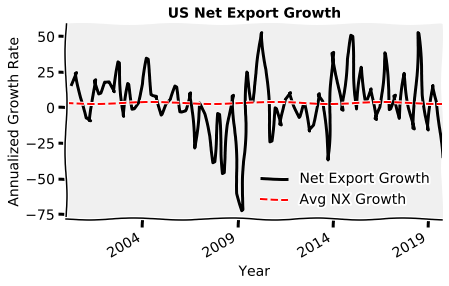

In [80]:
#plt.style.use('xkcd')

with plt.xkcd():

    fig, ax = plt.subplots()

    usdata.nx_growth.plot(ax = ax, linewidth = 3.0, color = 'black')
    usdata.avg_nx_growth.plot(ax = ax, linewidth = 2.0, color = 'red', linestyle = '--')


    ax.set_title('US Net Export Growth', fontsize= 14, fontweight = 'bold')
    ax.set_ylabel('Annualized Growth Rate', fontsize = 14)
    ax.set_xlabel('Year', fontsize = 14)

    ax.set_xlim(dt.datetime(2000,1,1))
    ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')

    ax.legend(["Net Export Growth", "Avg NX Growth"], frameon = False, loc = "lower right")
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

    fig.autofmt_xdate()

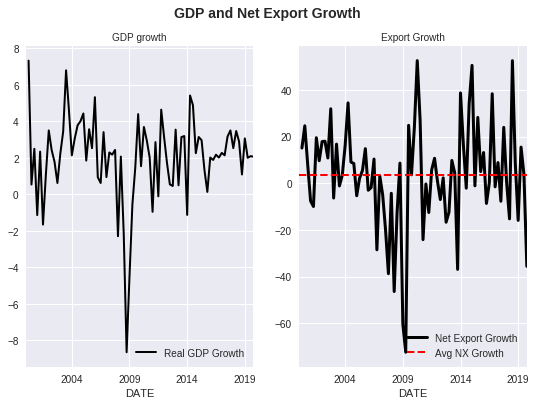

In [89]:
plt.style.use('seaborn-bright')

fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True)

usdata.gdp_growth.plot(ax = ax[0], color = 'black', linewidth = 2)

usdata.nx_growth.plot(ax = ax[1], linewidth = 3.0, color = 'black')
usdata.avg_nx_growth.plot(ax = ax[1], linewidth = 2.0, color = 'red', linestyle = '--')

fig.suptitle("GDP and Net Export Growth", fontweight = 'bold', fontsize = 14 )
ax[0].set_title("GDP growth", fontsize = 10)
ax[1].set_title("Export Growth", fontsize = 10)

ax[1].legend(["Net Export Growth", "Avg NX Growth"], frameon = False, loc = "lower right")
ax[0].legend(["Real GDP Growth"], frameon = False, loc = "lower right")

